In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image

In [2]:
img_name = Path("Pos0", "img_000000010_Default_000.tif")
img_filepath_part = [
    "1ms_1",
    "5ms_1",
    "10ms_1",
    "20ms_1",
    "30ms_1",
    "40ms_1",
    "50ms_1",
    "60ms_1",
    "70ms_1",
    "80ms_1",
    "90ms_1",
    "100ms_1",
]
img_file_start = Path("/", "Volumes", "krauss", "Lisa", "GMR", "Array", "Speed Test", "Exposure tests")
img_paths = [Path(img_file_start, i, img_name) for i in img_filepath_part]
print(img_paths)

[PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/1ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/5ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/10ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/20ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/30ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/40ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/50ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/60ms_1/Pos0/img_000000010_Default_000.tif'), PosixPath('/Volumes/krauss/Lisa/GMR/Array/Speed Test/Exposure tests/70ms_1/Pos0/img_000000010_Def

In [48]:
img = Image.open(img_paths[10])
img_np = np.array(img)
print(img.size)
print(img_np.shape)

(1920, 1460)
(1460, 1920)


slice(896, 1072, None)
slice(815, 860, None)
(45, 176)


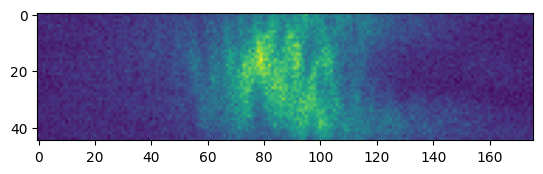

In [49]:
offset_x = 0
offset_y = 5

origin = (810, 896)
size = (45, 176)

roi_x_slice = slice(origin[1] + offset_x, origin[1]  + offset_x + size[1])
roi_y_slice = slice(origin[0] + offset_y, origin[0] + offset_y + size[0])
print(roi_x_slice)
print(roi_y_slice)
roi_img = img_np[roi_y_slice, roi_x_slice]
print(roi_img.shape)
plt.imshow(roi_img)

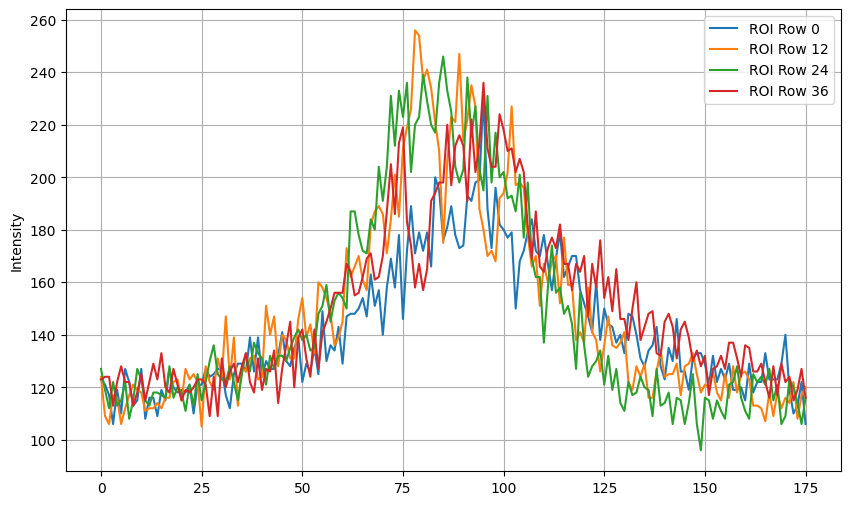

Max/Min of row 0: 231/106
45


In [50]:
num_rows, num_cols = roi_img.shape
    

plt.figure(figsize=(10, 6))

for row_index in range(0, num_rows, 12):
    row_intensities = roi_img[row_index, :]
    plt.plot(row_intensities, label=f'ROI Row {row_index}')

plt.ylabel('Intensity')
plt.legend()
plt.grid(True)
plt.show()
print(f"Max/Min of row 0: {np.amax(roi_img[0, :])}/{np.amin(roi_img[0, :])}")
print(num_rows)

0
1
2
3
4
5
6
7
8
9
10
11


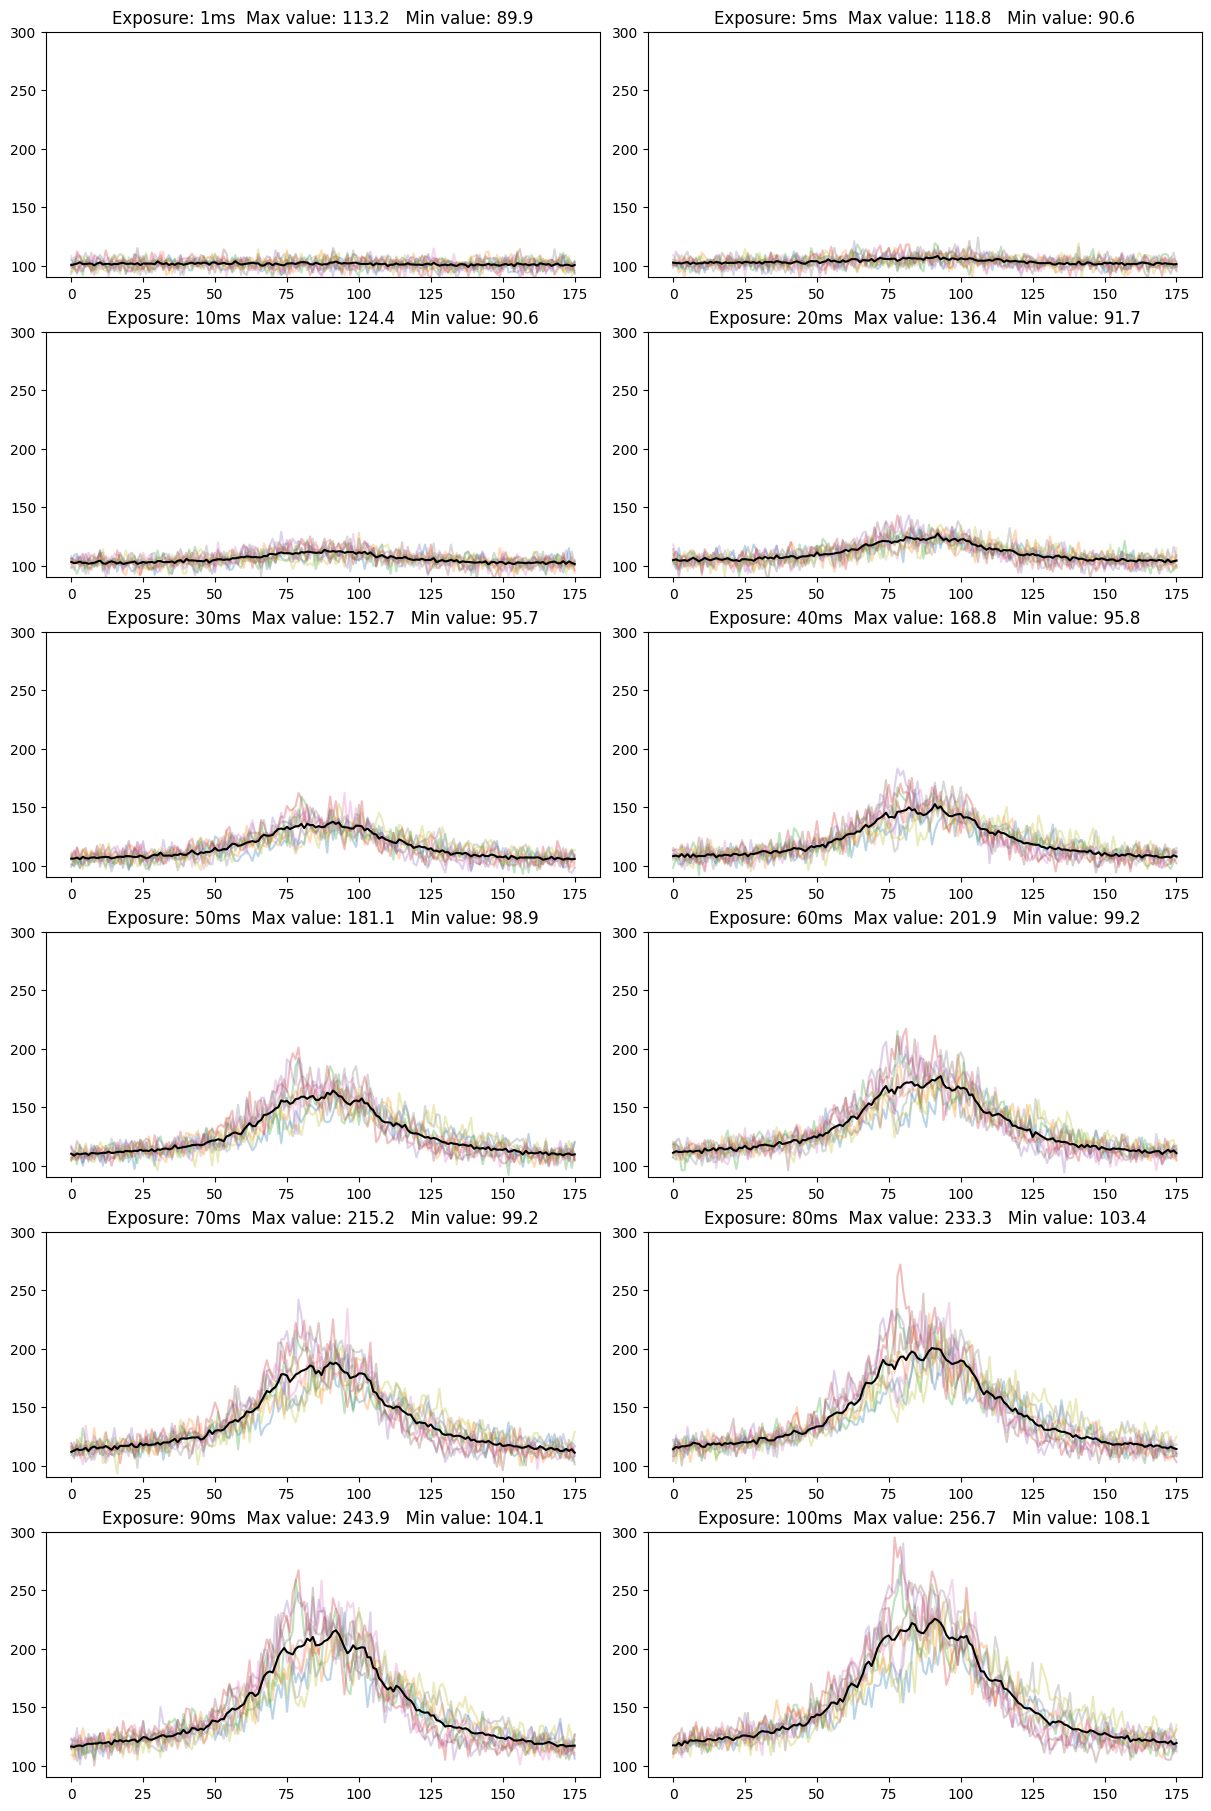

In [57]:
offset_x = 0
offset_y = 5

origin = (810, 896)
size = (45, 176)

roi_x_slice = slice(origin[1] + offset_x, origin[1]  + offset_x + size[1])
roi_y_slice = slice(origin[0] + offset_y, origin[0] + offset_y + size[0])

fig, ax = plt.subplots(6, 2, figsize=(12, 18), constrained_layout=True)
ax = ax.flatten()

for idx, i in enumerate(img_paths):
    print(idx)
    img = Image.open(i)
    img_np = np.array(img)
    roi_img = img_np[roi_y_slice, roi_x_slice]
    max = []
    min = []
    for row_index in range(0, 45, 5):
        row_intensities = roi_img[row_index, :]
        max.append(np.amax(row_intensities))
        min.append(np.amin(row_intensities))
        ax[idx].plot(row_intensities, alpha=0.3)
    ax[idx].plot(np.mean(roi_img, axis=0), color='black')
    ax[idx].set_ylim([90, 300])
    ax[idx].set_title(f"Exposure: {img_filepath_part[idx][:-2]}  Max value: {np.mean(max):.1f}   Min value: {np.mean(min):.1f}")

plt.savefig(Path(img_file_start, "Exposure Time Results.png"), dpi=300)